In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("Automobile_data.csv")
data

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [7]:
#We need to check unique data of all columns so as to make sure is there any 
#character or blank value in the data

for col in data:
    print(col,":",data[col].unique())
    print("--------------------------------------------------------------")

symboling : [ 3  1  2  0 -1 -2]
--------------------------------------------------------------
normalized-losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
--------------------------------------------------------------
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
--------------------------------------------------------------
fuel-type : ['gas' 'diesel']
--------------------------------------------------------------
body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
--------------------------------------------------------------
drive-whee

In [8]:
#Replacing "?" with NAn values

#We can use replace function only on string data not on numbers and Nan values

data["normalized-losses"].replace("?",np.nan,inplace=True)
data["horsepower"].replace("?",np.nan,inplace=True)

In [9]:
col = ["normalized-losses","horsepower"]

for i in col:
    print(i,":",data[i].unique())
    print("--------------------------------------------------")

normalized-losses : [nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
--------------------------------------------------
horsepower : ['111' '154' '102' '115' '110' '140' '160' '101' '121' '182' '48' '70'
 '68' '88' '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '135'
 '84' '64' '120' '72' '123' '155' '184' '175' '116' '69' '55' '97' '152'
 '200' '95' '142' '143' '207' '288' nan '73' '82' '94' '62' '56' '112'
 '92' '161' '156' '52' '85' '114' '162' '134' '106']
--------------------------------------------------


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [11]:
data.isnull().sum()  #this function will give number of Nan values in particular columns

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [12]:
#Changing the data type of normalized-lossess and horsepower
#we are going to change data type of normalized-lossess and horsepower as it is in object

#wHERE THERE ARE NAN VALUES IN ANY COLUMN WE CAN'T DORECTLY CHANGE THE COLUMN DATATYPE TO INTEGER
#WE HAVE TO CHANGE IT BY FLOAT VALUE FIRST

data["normalized-losses"]=data["normalized-losses"].astype("float64")

data["horsepower"]=data["horsepower"].astype("float64")


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.2+ KB


In [14]:
data.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,203.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,104.256158,25.219512,30.751220,13227.478049
std,1.245307,35.442168,2.145204,2.443522,41.642693,39.714369,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,64.100000,52.000000,97.000000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,65.500000,54.100000,120.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,150.000000,66.900000,55.500000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


In [15]:
#Replacing nan values with mean
#Nan values are considered as float values by default

#As we have checked the mean values of normalized-losses and horsepower 
#we can replace Nan values with mean

#fillna function is used to fill null values with any number

data["normalized-losses"].fillna(122,inplace=True)
data["horsepower"].fillna(104,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.2+ KB


In [17]:
data

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


In [18]:
data.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,104.253659,25.219512,30.751220,13227.478049
std,1.245307,31.681008,2.145204,2.443522,41.642693,39.519219,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.100000,52.000000,97.000000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,66.900000,55.500000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


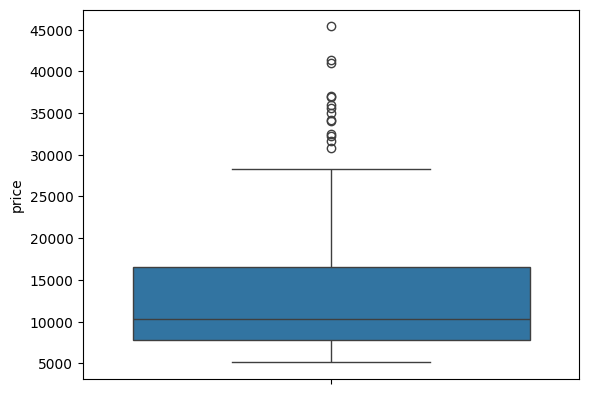

In [19]:
#Handling Outliers

#An Outliers is an observation that lies at abnormal distance from other values in a column

plt.figure()
sns.boxplot(data["price"])
plt.show()

In [20]:
#We are vgoing to find Q1, Q2, Q3 & IQR (Inter Quartile Range)

Q1 = np.quantile(data["price"],0.25) #25%
Q2 = np.quantile(data["price"],0.50) #25%
Q3 = np.quantile(data["price"],0.75) #25%
IQR = Q3-Q1

print("Q1:",Q1)
print("Q2:",Q2)
print("Q3:",Q3)
print("IQR:",IQR)

Q1: 7788.0
Q2: 10345.0
Q3: 16500.0
IQR: 8712.0


In [21]:
#Upper Whisker & Lower Whisker

UW= Q3+(1.5*IQR)
LW= Q1-(1.5*IQR)

print("UW:",UW)
print("LW:",LW)
#ANY VALUES LESS THAN LOWER WHISKER & MORE THAN UPPER WHISKER IS CONSIDERED AS OUTLIERS

UW: 29568.0
LW: -5280.0


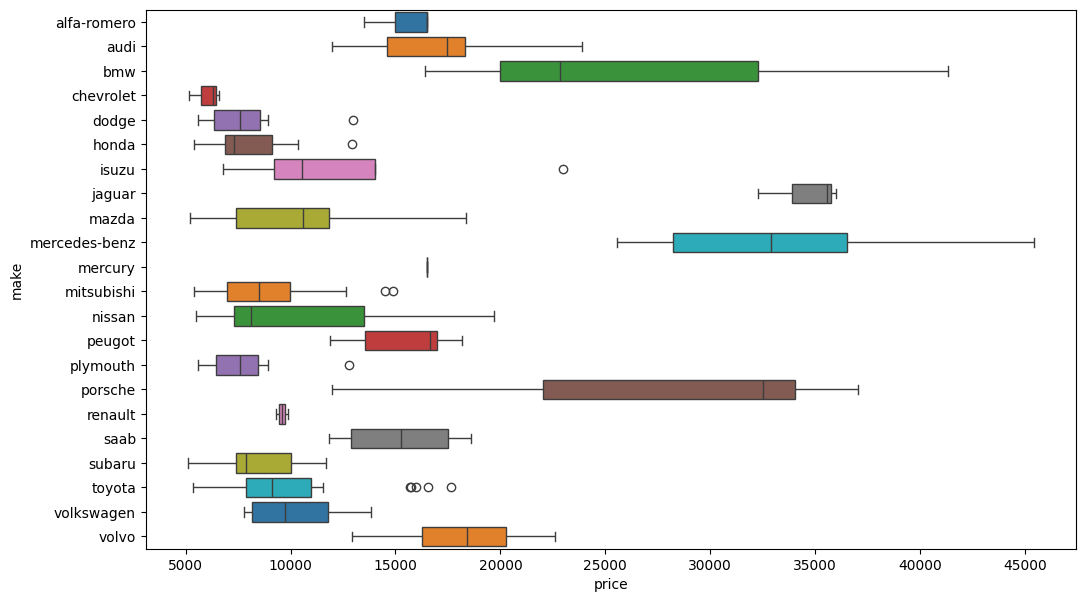

In [22]:
#Removing all outliers we are going to plot makrs with price

plt.figure(figsize=(12,7))
sns.boxplot(data=data,x="price",y="make",palette="tab10")
plt.show()

In [23]:
#Removing all outliers with loop

for maker in data["make"].unique(): #for loop will run on makercolumn of each maker as we given unique
    price=data[data["make"]==maker]["price"] #all the maker price data will be store in price variable with index
    Q1 = np.quantile(price,0.25) #finding Q1
    Q3 = np.quantile(price,0.75)#find Q3
    IQR = Q3-Q1 #finding IQR for upper whisker and lower whisker
    UW = Q3+(1.5*IQR)#UPPER WHISKER
    LW = Q1-(1.5*IQR)#LOWER WHISKER
    
    i = price[price>UW].index #all the data of price will get stored in i with index number if price greater than upper whisker
    if len(i)!=0:  #i list length should not have 0 elements .. It will store all row number or index number which is > UW
        data.drop(i,inplace=True)


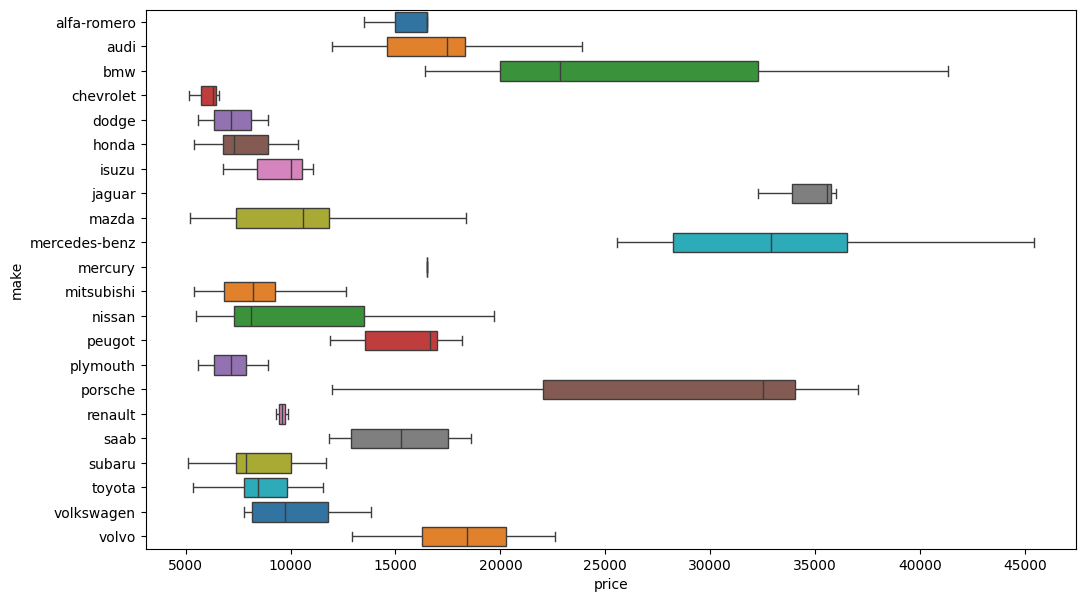

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data,x="price",y="make",palette="tab10")
plt.show()

In [25]:
data.shape

(194, 15)